In [ ]:
import pandas as pd

# Load train.csv for model training
train_df = pd.read_csv('/content/train.csv')
print(f"Train data shape: {train_df.shape}")

# Load test.csv for predictions
test_df = pd.read_csv('/content/test.csv')
print(f"Test data shape: {test_df.shape}")

# Load gender_submission.csv for reference
gender_submission = pd.read_csv('/content/gender_submission.csv')
print(f"Gender submission shape: {gender_submission.shape}")

df = train_df.copy()

print("\nTrain data sample:")
display(df.head())
print("\nTest data sample:")
display(test_df.head())
print("\nGender submission sample:")
display(gender_submission.head())

Train data shape: (891, 12)
Test data shape: (418, 11)
Gender submission shape: (418, 2)

Train data sample:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test data sample:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Gender submission sample:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Titanic: Machine Learning from Disaster

This notebook analyzes the famous Titanic dataset from Kaggle. The goal is to predict which passengers survived the Titanic shipwreck based on various features.

**Kaggle Competition Link:** [Titanic: Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)

In [ ]:
# Basic Data Exploration

In [12]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Correlation between numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate and display correlation matrix
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Display counts of categorical features
print("\nCategorical Features Distribution:")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    print(f"{col} unique values: {df[col].nunique()}")

In [8]:
# Feature Engineering and Preprocessing

In [16]:
# Creating binary features
df['is_female'] = (df['Sex'] == 'female').astype(int) if 'Sex' in df.columns else 0

df['is_child'] = (df['Age'] < 16).astype(int) if 'Age' in df.columns else 0

# Handling missing values
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0] if not df['Embarked'].empty else '')
if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Encoding categorical features
columns_to_encode = [col for col in ['Embarked', 'Pclass'] if col in df.columns]
if columns_to_encode:
    df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,is_female,is_child,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,False,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,False,True,False,True


In [ ]:
# SQL Query

In [21]:
!pip install pandasql --quiet
import pandasql as psql

# Count survivors by sex
query = """
SELECT is_female, COUNT(*) as total, SUM(Survived) as survived
FROM df
GROUP BY is_female
"""
result = psql.sqldf(query, locals())
print(result)

# Average age of survivors
query2 = """
SELECT AVG(Age) as avg_age_survivor
FROM df
WHERE Survived = 1
"""
result2 = psql.sqldf(query2, locals())
print(result2)


temp_df = df.copy()
if 'Pclass_2' in df.columns and 'Pclass_3' in df.columns:
    temp_df['Pclass'] = 1
    temp_df.loc[df['Pclass_2'] == 1, 'Pclass'] = 2
    temp_df.loc[df['Pclass_3'] == 1, 'Pclass'] = 3
elif 'Pclass' not in df.columns:
    print("Note: Cannot create Pclass column from one-hot encoded data")
    temp_df['Pclass'] = 0

# Survival rates by passenger class and gender
query3 = """
SELECT
    CASE
        WHEN Pclass = 1 THEN 'First Class'
        WHEN Pclass = 2 THEN 'Second Class'
        WHEN Pclass = 3 THEN 'Third Class'
        ELSE 'Unknown'
    END as Class,
    CASE WHEN is_female = 1 THEN 'Female' ELSE 'Male' END as Gender,
    COUNT(*) as Total,
    SUM(Survived) as Survivors,
    ROUND(100.0 * SUM(Survived) / COUNT(*), 1) as Survival_Rate
FROM temp_df
GROUP BY Pclass, is_female
ORDER BY Pclass, is_female DESC
"""
result3 = psql.sqldf(query3, locals())
print("\nSurvival rates by passenger class and gender:")
print(result3)

   is_female  total  survived
0          0    577       109
1          1    314       233
   avg_age_survivor
0         28.291433

Survival rates by passenger class and gender:
          Class  Gender  Total  Survivors  Survival_Rate
0   First Class  Female     94         91           96.8
1   First Class    Male    122         45           36.9
2  Second Class  Female     76         70           92.1
3  Second Class    Male    108         17           15.7
4   Third Class  Female    144         72           50.0
5   Third Class    Male    347         47           13.5


In [ ]:
# Visualizing Results

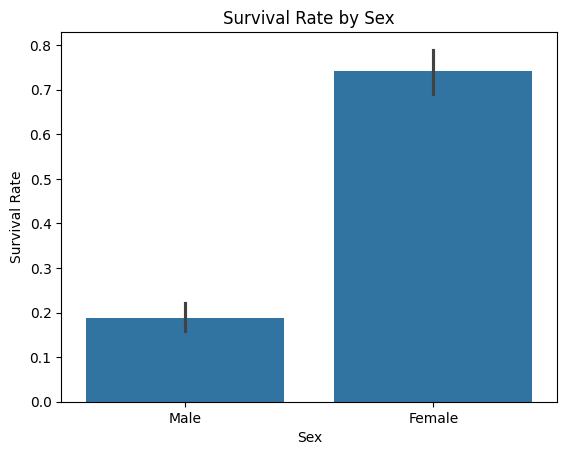

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart: Survival by Sex
sns.barplot(x='is_female', y='Survived', data=df)
plt.xticks([0,1], ['Male', 'Female'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()

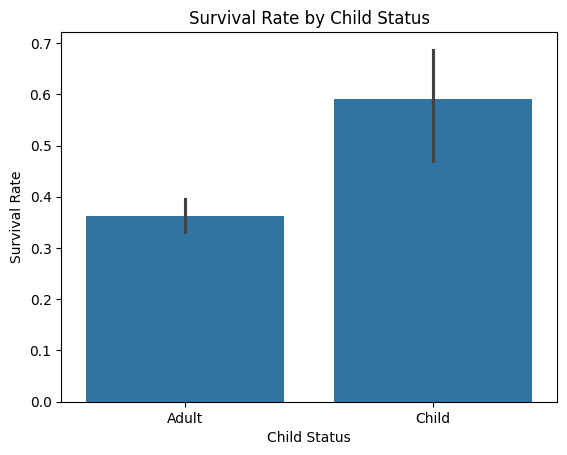

In [25]:
# Bar chart: Survival by Child Status
sns.barplot(x='is_child', y='Survived', data=df)
plt.xticks([0,1], ['Adult', 'Child'])
plt.title('Survival Rate by Child Status')
plt.ylabel('Survival Rate')
plt.xlabel('Child Status')
plt.show()

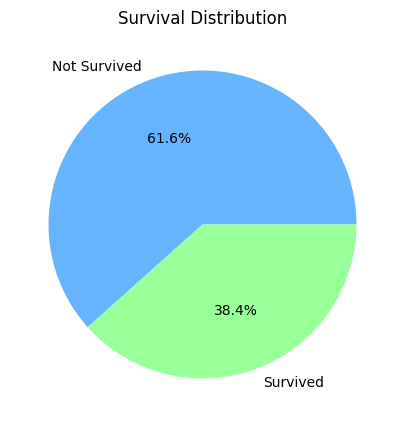

In [26]:
# Pie chart: Survival Distribution
surv_counts = df['Survived'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(surv_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Survival Distribution')
plt.show()

In [ ]:
# Model Building and Training

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


y = df['Survived']
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Sex'], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled_df, y, cv=kf, scoring='accuracy')

print("\nCross-Validation Results (5-fold):")
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Test Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Cross-Validation Results (5-fold):
CV Accuracy Scores: [0.79888268 0.79213483 0.85955056 0.76966292 0.81460674]
Mean CV Accuracy: 0.8070
Standard Deviation: 0.0300


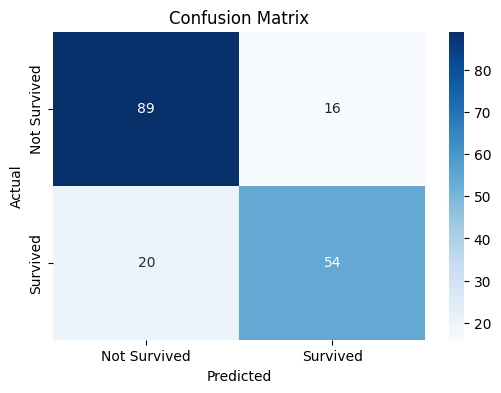

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



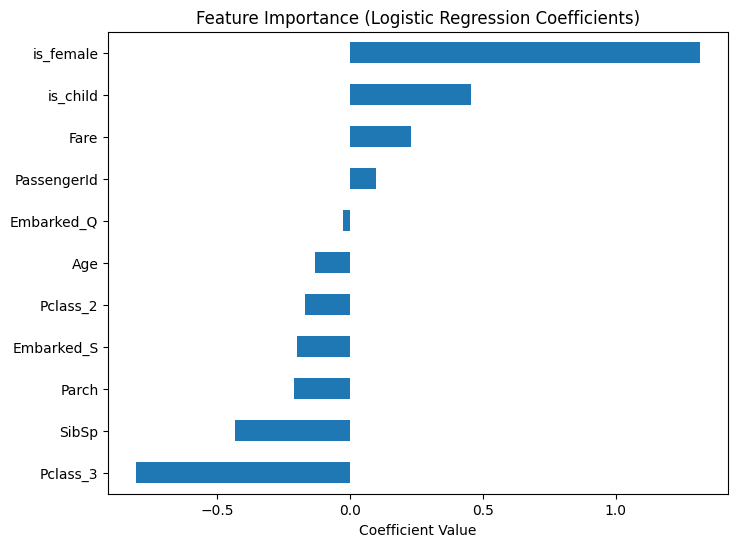

In [30]:
# Coefficients for logistic regression
feature_importance = pd.Series(model.coef_[0], index=X_scaled_df.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()

In [ ]:
# Predictions on Test Dataset

In [32]:
if 'Age' in test_df.columns:
    test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
if 'Fare' in test_df.columns:
    test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
if 'Embarked' in test_df.columns and 'Embarked' in train_df.columns:
    test_df['Embarked'] = test_df['Embarked'].fillna(train_df['Embarked'].mode()[0] if not train_df['Embarked'].empty else '')

if 'Sex' in test_df.columns:
    test_df['is_female'] = (test_df['Sex'] == 'female').astype(int)
if 'Age' in test_df.columns:
    test_df['is_child'] = (test_df['Age'] < 16).astype(int)

columns_to_encode = [col for col in ['Embarked', 'Pclass'] if col in test_df.columns]
if columns_to_encode:
    test_df = pd.get_dummies(test_df, columns=columns_to_encode, drop_first=True)

X_cols = [col for col in X.columns if col in test_df.columns]
X_test_submission = test_df[X_cols]

X_test_scaled_array = scaler.transform(X_test_submission)
X_test_submission_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test_submission.columns)

test_predictions = model.predict(X_test_submission_scaled)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

display(submission.head())

submission.to_csv('/content/titanic_predictions.csv', index=False)
print("Predictions saved as '/content/titanic_predictions.csv'")

print("\nAccuracy compared to gender_submission baseline: {:.2f}%".format(
    100 * (submission['Survived'] == gender_submission['Survived']).mean()
))

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Predictions saved as '/content/titanic_predictions.csv'

Accuracy compared to gender_submission baseline: 94.02%
